# Часть 1

In [2]:
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
with open('data/names.txt') as f:
    lines = f.readlines()
    names = dict(zip([name.split('\t')[0] for name in lines][:44], [name.split('\t')[1][:-1] for name in lines][:44]))
    names_list = [name.split('\t')[1][:-1] for name in lines][:44]
names

{'A01_02': 'Agriculture, hunting, forestry',
 'A03': 'Fishing and aquaculture',
 'B05_06': 'Mining and quarrying, energy producing products',
 'B07_08': 'Mining and quarrying, non-energy producing products',
 'B09': 'Mining support service activities',
 'C10T12': 'Food products, beverages and tobacco',
 'C13T15': 'Textiles, textile products, leather and footwear',
 'C16': 'Wood and products of wood and cork',
 'C17_18': 'Paper products and printing',
 'C19': 'Coke and refined petroleum products',
 'C20': 'Chemical and chemical products',
 'C21': 'Pharmaceuticals, medicinal chemical and botanical products',
 'C22': 'Rubber and plastics products',
 'C23': 'Other non-metallic mineral products',
 'C24': 'Basic metals',
 'C25': 'Fabricated metal products',
 'C26': 'Computer, electronic and optical equipment',
 'C27': 'Electrical equipment',
 'C28': 'Machinery and equipment, nec ',
 'C29': 'Motor vehicles, trailers and semi-trailers',
 'C30': 'Other transport equipment',
 'C31T33': 'Manufact

In [4]:
# считываем данные и обрезаем
filenames = ["data/JPN1998dom.csv", "data/JPN2020dom.csv"]
N = len(filenames)
data = []
X = []
for i in range(N):
    data.append(pd.read_csv(filenames[i]))
    X.append(data[i].iloc[:44,-1:].to_numpy())
    data[i] = data[i].iloc[:44, 1:45]
    data[i].index = data[i].columns


In [5]:
# матрица прямых затрат Леонтьева
Z = []
A = []
for i in range(N):
    Z.append(data[i].to_numpy())
    A.append(np.divide(Z[i], X[i]))


In [6]:
pd.DataFrame(A[0], index=names_list, columns=names_list)

,"Agriculture, hunting, forestry",Fishing and aquaculture,"Mining and quarrying, energy producing products","Mining and quarrying, non-energy producing products",Mining support service activities,"Food products, beverages and tobacco","Textiles, textile products, leather and footwear",Wood and products of wood and cork,Paper products and printing,Coke and refined petroleum products,...,IT and other information services,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support services,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities
"Agriculture, hunting, forestry",0.061757,0.000233,1.504322e-05,0.000119,0.000008,0.337884,0.004252,0.030367,0.001425,0.000274,...,0.000199,0.000892,0.000142,0.002369,0.000396,0.001396,0.004069,0.016315,0.001263,0.002230
Fishing and aquaculture,0.000606,0.036807,5.662578e-06,0.000102,0.000006,0.398810,0.000640,0.000153,0.000980,0.000317,...,0.001234,0.001784,0.000272,0.001246,0.000821,0.002225,0.001127,0.031710,0.000589,0.001291
"Mining and quarrying, energy producing products",0.000445,0.000074,2.227006e-04,0.000074,0.000594,0.003415,0.000445,0.000371,0.004231,0.648578,...,0.000074,0.000148,0.000074,0.009725,0.000148,0.000742,0.000742,0.000594,0.000223,0.000297
"Mining and quarrying, non-energy producing products",0.000524,0.000062,0.000000e+00,0.002495,0.000724,0.002927,0.000616,0.000431,0.011722,0.013247,...,0.000077,0.000169,0.000092,0.002911,0.000077,0.001032,0.000200,0.000585,0.000323,0.000585
Mining support service activities,0.000849,0.027373,6.578017e-03,0.014995,0.014429,0.006967,0.000000,0.000141,0.008983,0.462406,...,0.000035,0.000106,0.003006,0.000637,0.001096,0.005765,0.000141,0.000707,0.000707,0.000106
"Food products, beverages and tobacco",0.008592,0.002191,7.640467e-06,0.000107,0.000013,0.079518,0.001144,0.000137,0.001616,0.000138,...,0.000598,0.002752,0.000427,0.001967,0.000827,0.001970,0.004608,0.017808,0.000901,0.001229
"Textiles, textile products, leather and footwear",0.001295,0.002100,1.577880e-05,0.000323,0.000033,0.003569,0.170615,0.000689,0.009611,0.000285,...,0.001914,0.004610,0.000458,0.003528,0.003820,0.006091,0.000792,0.014524,0.005132,0.004175
Wood and products of wood and cork,0.001694,0.000621,2.172204e-05,0.000252,0.000113,0.004310,0.001534,0.098297,0.066726,0.000030,...,0.000239,0.001017,0.000139,0.001490,0.001329,0.001103,0.000091,0.000526,0.002424,0.002168
Paper products and printing,0.005705,0.000262,2.902746e-05,0.000194,0.000060,0.043232,0.008019,0.001655,0.220491,0.000591,...,0.013678,0.038625,0.002439,0.053954,0.011894,0.029894,0.014304,0.018050,0.011639,0.008098
Coke and refined petroleum products,0.005661,0.006423,3.648291e-05,0.005019,0.000781,0.009744,0.002233,0.001943,0.007751,0.037136,...,0.003564,0.004026,0.005821,0.024395,0.005694,0.029031,0.008095,0.018955,0.007991,0.008104


In [7]:
# Обратная матрица Леонтьева
D = []
for i in range(N):
    D.append(np.linalg.inv(np.eye(A[i].shape[0]) - A[i]))
    print(np.all(D[i] >= 0))

True
True


In [8]:
pd.DataFrame(D[0], index=names_list, columns=names_list)

,"Agriculture, hunting, forestry",Fishing and aquaculture,"Mining and quarrying, energy producing products","Mining and quarrying, non-energy producing products",Mining support service activities,"Food products, beverages and tobacco","Textiles, textile products, leather and footwear",Wood and products of wood and cork,Paper products and printing,Coke and refined petroleum products,...,IT and other information services,Financial and insurance activities,Real estate activities,"Professional, scientific and technical activities",Administrative and support services,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities
"Agriculture, hunting, forestry",1.071080,0.001705,0.000041,0.000484,0.000105,0.401575,0.009072,0.036705,0.009925,0.001325,...,0.002432,0.007782,0.003657,0.008860,0.003709,0.006136,0.007410,0.032487,0.003832,0.006376
Fishing and aquaculture,0.006150,1.039819,0.000034,0.000477,0.000090,0.459753,0.003662,0.001002,0.006335,0.001324,...,0.004126,0.010813,0.003775,0.008875,0.005057,0.006492,0.004467,0.048522,0.003366,0.005202
"Mining and quarrying, energy producing products",0.011260,0.005960,1.000360,0.004141,0.001458,0.038070,0.010216,0.004050,0.026673,0.678631,...,0.007063,0.013715,0.014209,0.042820,0.009198,0.039602,0.013219,0.044068,0.013407,0.014009
"Mining and quarrying, non-energy producing products",0.003722,0.000667,0.000049,1.002888,0.001013,0.020449,0.004863,0.001376,0.020454,0.016025,...,0.001889,0.005135,0.018811,0.009350,0.002567,0.011493,0.004648,0.015038,0.003953,0.005443
Mining support service activities,0.008942,0.033078,0.006740,0.018117,1.015267,0.045081,0.006811,0.002582,0.024640,0.494849,...,0.004438,0.009430,0.018360,0.021443,0.007212,0.030801,0.008122,0.029396,0.008522,0.009384
"Food products, beverages and tobacco",0.010852,0.002845,0.000024,0.000314,0.000063,1.095930,0.002932,0.000870,0.004828,0.000753,...,0.002296,0.008084,0.002652,0.006481,0.003272,0.004058,0.005791,0.024564,0.002440,0.003419
"Textiles, textile products, leather and footwear",0.003176,0.003012,0.000035,0.000609,0.000129,0.012412,1.207961,0.001414,0.017455,0.001192,...,0.003671,0.009516,0.003241,0.008635,0.006401,0.011793,0.002168,0.023111,0.007771,0.008079
Wood and products of wood and cork,0.006260,0.001733,0.000055,0.000637,0.000323,0.023581,0.006373,1.110159,0.100442,0.001986,...,0.003845,0.010806,0.019255,0.014508,0.006163,0.013691,0.004946,0.010773,0.007145,0.006964
Paper products and printing,0.013610,0.001772,0.000088,0.000864,0.000386,0.085474,0.020062,0.004179,1.294252,0.003640,...,0.025057,0.071495,0.015744,0.101607,0.023231,0.053431,0.023505,0.047085,0.021162,0.018464
Coke and refined petroleum products,0.013250,0.008326,0.000090,0.005683,0.001049,0.036985,0.009310,0.003991,0.020157,1.042735,...,0.006960,0.013515,0.014391,0.035607,0.009981,0.041007,0.012152,0.039992,0.012529,0.014137


In [9]:
d = []
dd = []
for i in range(N):
    d.append(np.zeros(A[i].shape[0]))
    for j in range(d[i].size):
        d[i][j] = np.sum(A[i][j, :]) - A[i][j, j]
    dd.append(np.zeros(A[i].shape[0]))
    for j in range(d[i].shape[0]):
        for k in range(d[i].shape[0]):
            for l in range(d[i].shape[0]):
                if j != k:
                    dd[i][j] += A[i][j, l] * A[i][l, k]


In [10]:
def plot_graph(I, depth):
    eps = 0.05
    G = nx.DiGraph()
    for idx, label in enumerate(data[I].columns):
        G.add_node(label, weight=d[I][idx])

    for i, src in enumerate(data[I].columns):
        for j, dst in enumerate(data[I].columns):
            if i != j and A[I][i, j] > eps:
                G.add_edge(src, dst)


    plt.figure(figsize=(12, 12))
    if depth == 1:
        D = d[I]
    else:
        D = dd[I]
    nx.draw_networkx(
        G, 
        with_labels=True, 
        node_size=D*1000,
        edge_color='gray', 
        arrows=True, 
        font_size=8,
        labels=names
    )
    plt.axis('off')
    plt.show()


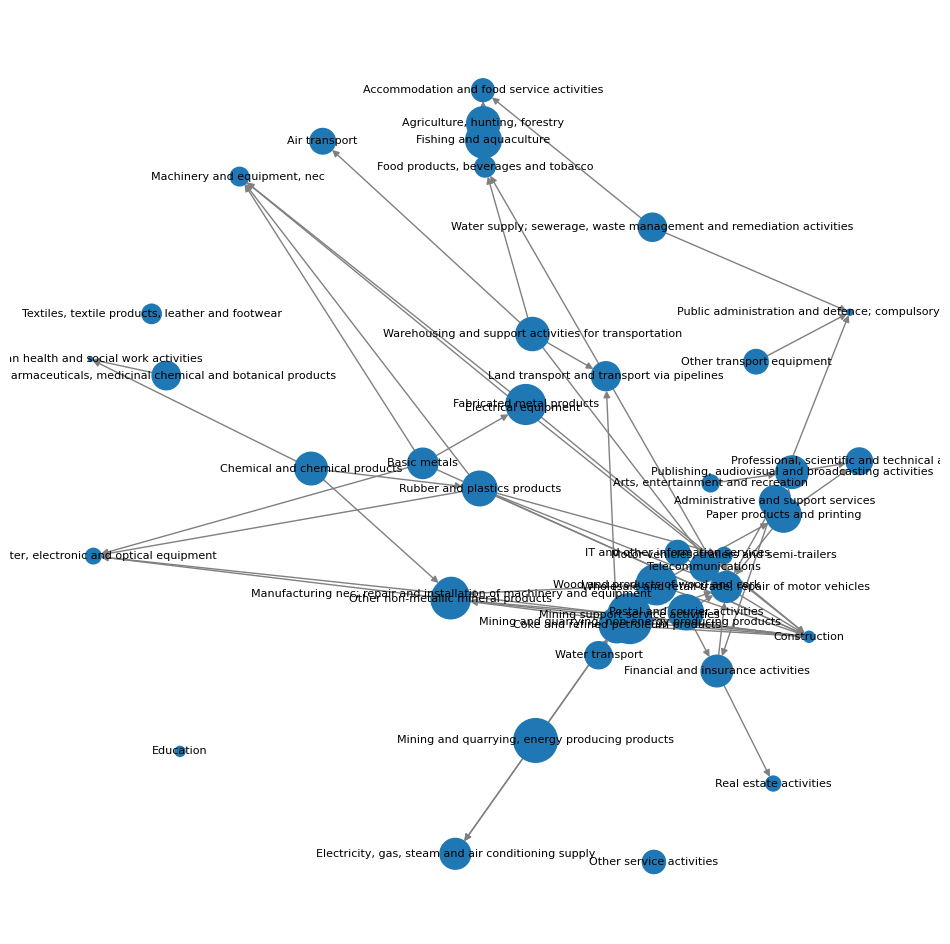

In [11]:
plot_graph(0, 1)

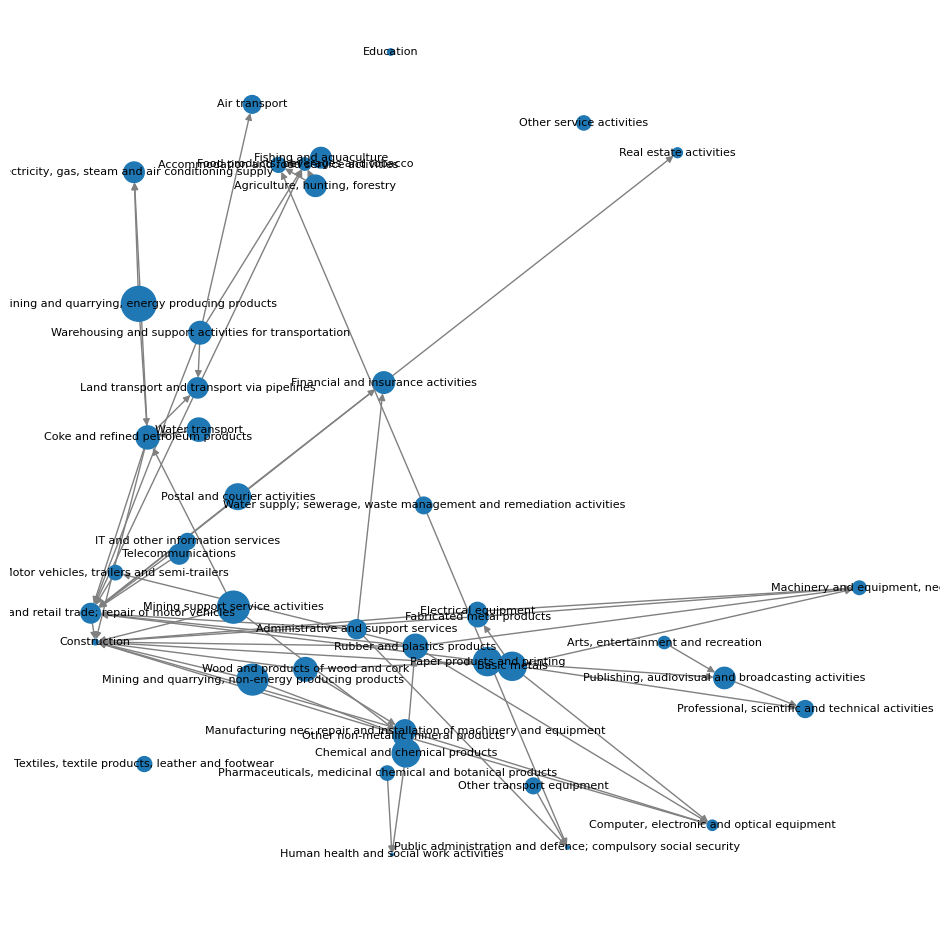

In [12]:
plot_graph(0, 2)

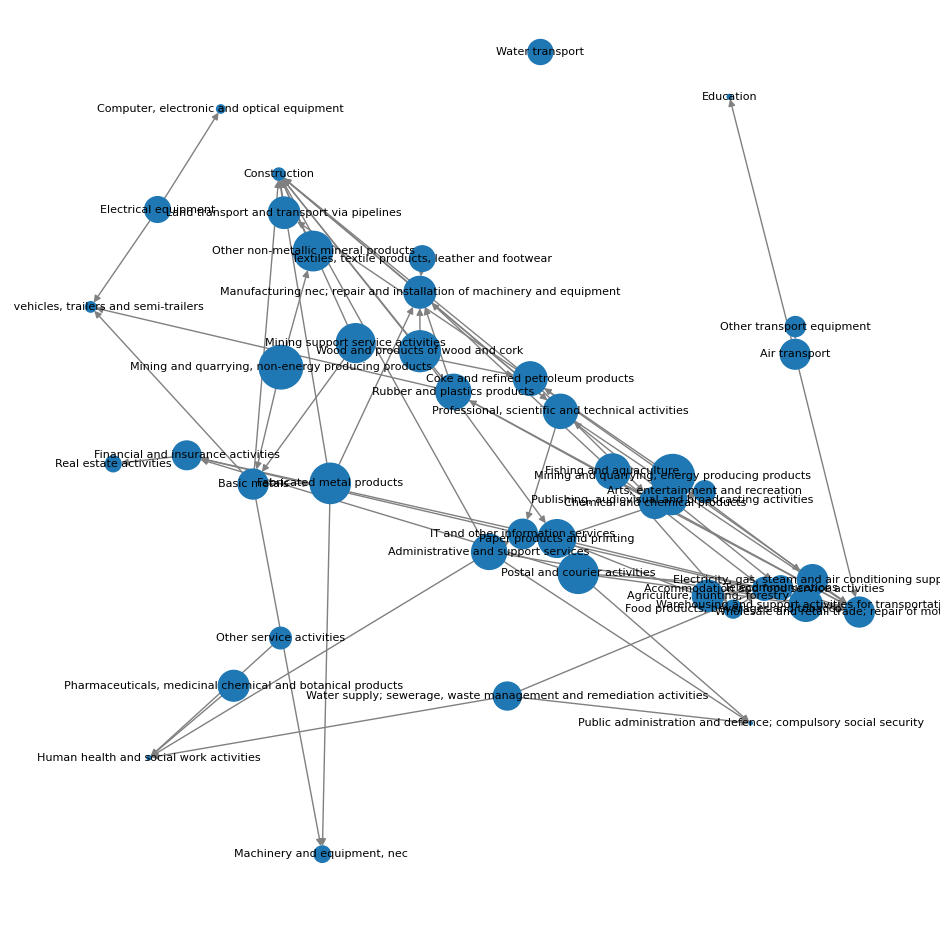

In [13]:
plot_graph(1, 1)

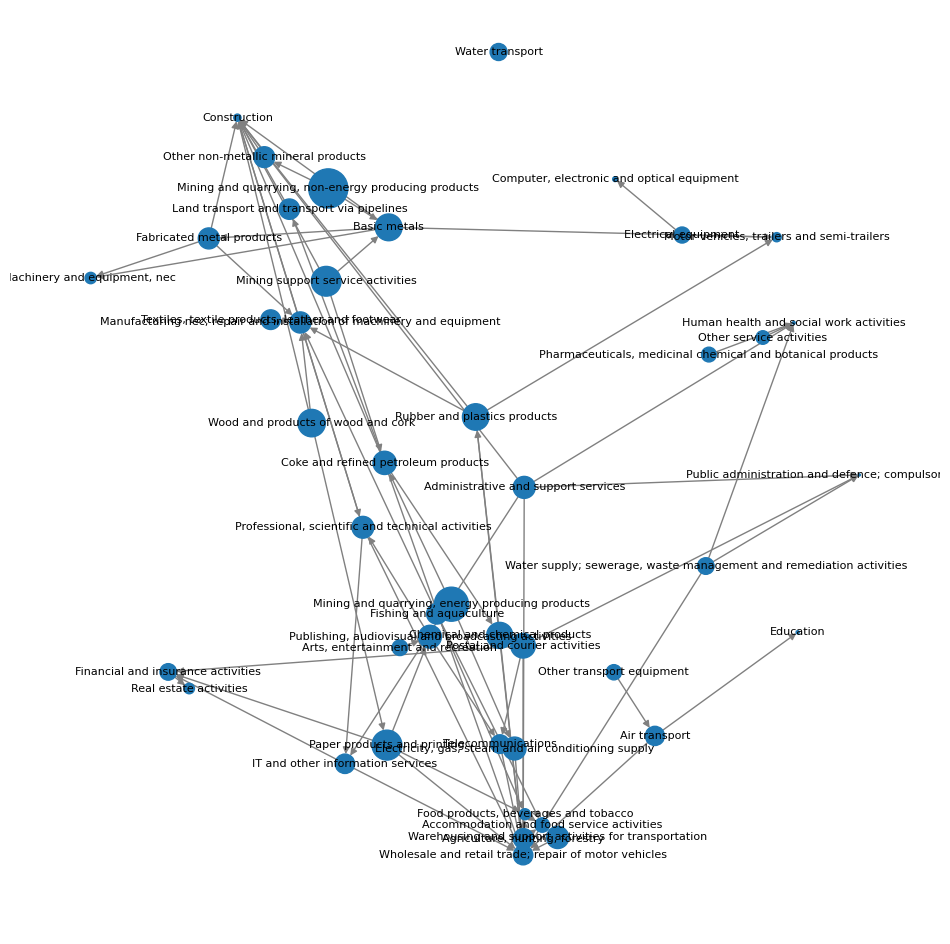

In [14]:
plot_graph(1, 2)

In [15]:
def print_sorted(I, depth, n):
    if depth == 1:
        D = d[I]
    else:
        D = dd[I]
    top = sorted(range(len(names_list)), key=lambda x: D[x], reverse=True)
    for i in top[:n]:
        print(names_list[i], D[i])
        

In [16]:
print_sorted(0, 1, 5)
print()
print_sorted(0, 2, 5)
print()
print_sorted(1, 1, 5)
print()
print_sorted(1, 2, 5)

Mining and quarrying, energy producing products 0.9877514661123897
Mining and quarrying, non-energy producing products 0.9738147315239825
Mining support service activities 0.9385698118545762
Wood and products of wood and cork 0.8487277403434687
Fabricated metal products 0.8192091766042868

Mining and quarrying, energy producing products 0.6267844622813634
Mining support service activities 0.5281091471365167
Mining and quarrying, non-energy producing products 0.49187419631441837
Paper products and printing 0.40787976231026807
Basic metals 0.40737012073242246

Mining and quarrying, energy producing products 0.9898900667451905
Mining and quarrying, non-energy producing products 0.9790453236928433
Wood and products of wood and cork 0.8610739479445393
Fabricated metal products 0.8411473076524388
Postal and courier activities 0.8306379583943948

Mining and quarrying, non-energy producing products 0.7934535522022562
Mining and quarrying, energy producing products 0.600689340980407
Paper produ

# Часть 2

In [17]:
W = []
sz = 44
for i in range(N):
    W.append(np.zeros(sz))
    for j in range(sz):
        W[i][j] = X[i][j] - np.sum(Z[i][j, :])


/tmp/ipykernel_11067/2443325335.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i][j] = X[i][j] - np.sum(Z[i][j, :])


In [18]:
def print_sorted_by_output(I, n):
    top = sorted(range(len(names_list)), key=lambda x: W[I][x])
    print("year", I)
    for i in top[:n]:
        print(i, names_list[i], W[I][i])
        

In [19]:
print_sorted_by_output(0, 10)
print()
print_sorted_by_output(1, 10)

year 0
2 Mining and quarrying, energy producing products 16.199999999999818
4 Mining support service activities 132.89999999999964
3 Mining and quarrying, non-energy producing products 153.79999999999927
7 Wood and products of wood and cork 1219.4000000000015
30 Postal and courier activities 4711.700000000001
1 Fishing and aquaculture 5356.300000000001
13 Other non-metallic mineral products 7939.799999999996
15 Fabricated metal products 13570.300000000003
28 Air transport 13874.100000000002
27 Water transport 13999.0

year 1
2 Mining and quarrying, energy producing products 10.29999999999984
3 Mining and quarrying, non-energy producing products 79.30000000000018
4 Mining support service activities 303.7000000000003
7 Wood and products of wood and cork 608.2000000000007
30 Postal and courier activities 1768.0
1 Fishing and aquaculture 4410.9
8 Paper products and printing 5744.699999999997
13 Other non-metallic mineral products 6558.9000000000015
15 Fabricated metal products 11236.700000

##### Исключение

In [20]:
n_excluded = 4
I_excluded = [2, 3, 4, 7]
I_included = [i for i in range(sz) if i not in I_excluded]
r = sz - n_excluded
B1 = []
for i in range(N):
    B1.append(A[i][np.ix_(I_included, I_included)] + A[i][np.ix_(I_included, I_excluded)] @ np.linalg.inv(np.eye(n_excluded) - A[i][np.ix_(I_excluded, I_excluded)]) @ A[i][np.ix_(I_excluded, I_included)])
pd.DataFrame(B1[0])

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.061814,0.000254,0.338029,0.004304,0.003674,0.000292,0.004885,0.001260,0.015859,0.000921,...,0.000207,0.000926,0.000147,0.002420,0.000441,0.001433,0.004072,0.016333,0.001344,0.002303
1,0.000606,0.036807,0.398811,0.000640,0.000992,0.000325,0.001333,0.000385,0.000601,0.000663,...,0.001234,0.001784,0.000272,0.001246,0.000821,0.002226,0.001127,0.031711,0.000589,0.001291
2,0.008592,0.002191,0.079519,0.001144,0.001628,0.000151,0.002513,0.000601,0.000349,0.000616,...,0.000598,0.002752,0.000427,0.001968,0.000827,0.001970,0.004608,0.017808,0.000901,0.001230
3,0.001297,0.002101,0.003573,0.170616,0.009666,0.000316,0.002892,0.000570,0.023912,0.003164,...,0.001915,0.004611,0.000458,0.003530,0.003821,0.006092,0.000792,0.014525,0.005134,0.004177
4,0.005708,0.000265,0.043241,0.008022,0.220616,0.000641,0.021782,0.006379,0.005555,0.011057,...,0.013678,0.038627,0.002440,0.053958,0.011897,0.029897,0.014304,0.018051,0.011644,0.008102
5,0.005668,0.006447,0.009774,0.002240,0.007962,0.037598,0.040809,0.002208,0.003221,0.017847,...,0.003565,0.004029,0.005824,0.024413,0.005698,0.029043,0.008096,0.018960,0.007998,0.008111
6,0.014937,0.000363,0.017927,0.026283,0.022149,0.004187,0.248787,0.021175,0.122809,0.012157,...,0.000431,0.000850,0.000200,0.002627,0.001595,0.004530,0.000889,0.102223,0.001564,0.006043
7,0.002650,0.000251,0.006417,0.002595,0.002370,0.000642,0.033996,0.094397,0.014051,0.001674,...,0.000146,0.000335,0.000037,0.001177,0.000405,0.004476,0.000511,0.313424,0.000451,0.001945
8,0.002326,0.000417,0.002054,0.011113,0.005328,0.000731,0.005069,0.000987,0.115041,0.005429,...,0.000380,0.001129,0.000200,0.001071,0.001119,0.018966,0.000230,0.018857,0.005500,0.027818
9,0.001524,0.000074,0.016679,0.001890,0.002125,0.001749,0.010288,0.003083,0.001653,0.081015,...,0.000388,0.001099,0.000677,0.001635,0.000504,0.004639,0.002905,0.007816,0.002387,0.002661


In [21]:
j = 0
for i in range(sz):
    if i not in I_excluded:
        print(j, names_list[i])
        j += 1

0 Agriculture, hunting, forestry
1 Fishing and aquaculture
2 Food products, beverages and tobacco
3 Textiles, textile products, leather and footwear
4 Paper products and printing
5 Coke and refined petroleum products
6 Chemical and chemical products
7 Pharmaceuticals, medicinal chemical and botanical products
8 Rubber and plastics products
9 Other non-metallic mineral products
10 Basic metals
11 Fabricated metal products
12 Computer, electronic and optical equipment
13 Electrical equipment
14 Machinery and equipment, nec 
15 Motor vehicles, trailers and semi-trailers
16 Other transport equipment
17 Manufacturing nec; repair and installation of machinery and equipment
18 Electricity, gas, steam and air conditioning supply
19 Water supply; sewerage, waste management and remediation activities
20 Construction
21 Wholesale and retail trade; repair of motor vehicles
22 Land transport and transport via pipelines
23 Water transport
24 Air transport
25 Warehousing and support activities for tr

##### Агрегирование

In [31]:
n_clusters = 6
BI = []
BI.append(list(range(0, 2))) # Природа
BI.append(list(range(2, 12))) # Базовое производство
BI.append(list(range(12, 18))) # Высокоуровневое производство
BI.append(list(range(18, 22))) # Коммунальные услуги и торговля
BI.append(list(range(22, 28))) # Транспорт и доставка
BI.append(list(range(28, 40))) # IT, услуги и развлечения

B2 = []
for i in range(N):
    B2.append(np.zeros((n_clusters, n_clusters)))
    for j in range(n_clusters):
        for k in range(n_clusters):
            B2[i][j, k] = np.sum(B1[i][np.ix_(BI[j], BI[k])] @ X[i][np.ix_(BI[k])])/np.sum(X[i][np.ix_(BI[k])])

pd.DataFrame(B2[0])

,0,1,2,3,4,5
0,0.058376,0.005629,0.005350,0.013723,0.005834,0.007740
1,0.039036,0.233222,0.174475,0.186668,0.033890,0.100893
2,0.007368,0.014136,0.225394,0.058918,0.014415,0.040078
3,0.008523,0.029289,0.030275,0.075352,0.016461,0.050693
4,0.118118,0.068460,0.039253,0.108056,0.062195,0.053557
5,0.010262,0.024692,0.045077,0.134953,0.040687,0.148517


In [23]:
def find_max_eigenvalue(A):
    y0 = np.ones(A.shape[0])
    y1 = np.zeros(A.shape[0])
    eig = 0
    for i in range(1000):
        y1 = A @ y0
        eig = np.dot(y1, y0) / np.dot(y0, y0)
        y0 = y1 / np.linalg.norm(y1)
    return eig


In [29]:
print(1/max(np.linalg.eigvals(B2[0]), key=abs).real)
print(1/max(np.linalg.eigvals(A[0]), key=abs).real)

2.6382210423244503
2.178794924047721


In [30]:
print(1/max(np.linalg.eigvals(B2[1]), key=abs).real)
print(1/max(np.linalg.eigvals(A[1]), key=abs).real)

2.6499129091711473
2.30286102188389


In [ ]:
def power_method(A):
    r = np.ones(A.shape[0]).T
    r /= np.linalg.norm(r)
    for i in range(1000):
        mu = (r.T @ A @ r) / np.dot(r, r)
        r = A @ r
        r /= np.linalg.norm(r)
    return mu

In [ ]:
print(1/power_method(B2[0]))
print(1/power_method(A[0]))

2.6382210423244485
2.1787949240477267


In [43]:
print(1/power_method(B2[1]))
print(1/power_method(A[1]))

2.6499129091711464
2.3028610218838987
